In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

## columns 설명

- Id - 플레이어의 Id
- groupId - 경기 내의 그룹을 식별하는 ID. 현재 그룹의 선수들이 서로 다른 경기에서 경기한다면, 그들은 매번 다른 groupId를 갖게 될 것이다.
- matchId - 경기를 식별하기 위한 ID. train set과 test set에 모두 있는 시합은 없다.
- matchDuration - 경기 시간.
- matchType - 경기 종류(duo, quad ...).
- assists - 팀 동료들과 같이 죽인 적 수이다.
- boosts - 부스트 아이템 사용한 수.
- damageDealt - 가한 데미지 총량. Note: 자신에게 가한 데미지는 제외.
- DBNOs - 빈사상태로 만든 적의 수.
- headshotKills - 헤드샷 으로 처리한 적의 수.
- heals - 치료 아이템 사용 수.
- killPlace - 경기에서 처치한 적의 수 랭킹.
- killPoints - 플레이어의 처치 기반 외부 랭킹 (Elo 방식의 순위). rankPoints에서 -1이 아닌 값이 있는 경우, 
- killPoints에서 0은 "없음"으로 처리되어야 한다.
- kills - 처치한 적의 수.
- killStreaks - 단기간에 가장 많이 처치한 적의 최대치.
- longestKill - 플레이어가 적을 죽인 가장 긴 거리. 선수를 다운시키고 멀리 운전하는 것이 가장 긴 처치로 이어질 수 있기 때문에 오해의 소지가 있을 수 있다.
- maxPlace - 경기에서 가장 순위가 낮은 것에 대한 데이터. 이것은 순위를 건너뛸 수도 있기 때문에 numGroups와 일치하지 않을 수 있다.
- numGroups - 경기에 있는 팀의 수.
- rankPoints - Elo 방식의 플레이어 랭킹. 다음 버전의 API에서는 삭제될 예정이기 때문에 사용에 주의. '-1' 값은 순위가 "None" 이다.
- revives - 플레이어가 팀원 회복 시킨 수.
- rideDistance - 차량으로 이동한 거리(단위 : 미터).
- roadKills - 차량으로 죽인 플레이어 수.
- swimDistance - 수영한 거리(단위 : 미터).
- teamKills - 팀킬한 횟수.
- vehicleDestroys - 차량을 폭파시킨 횟수.
- walkDistance - 걸은 총 거리(단위 : 미터).
- weaponsAcquired - 무기 얻은 갯수.
- winPoints - 플레이어의 승리 기반 외부 랭킹 (Elo 방식의 순위). rankPoints에서 -1이 아닌 값이 있는 경우, 
- winPoints에서 0은 "없음"으로 처리되어야 한다.
- winPlacePerc - 예측 목표. 순위의 퍼센트로 표시되며, 1이면 경기에서 1등이고 0이면 경기에서 꼴지 했다는 것이다. 이것은 numGroups로 계산되는게 아니라, maxPlace로 계산되기 때문에 누락되는 것이 있을수도다

In [3]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/modelingPUBG/data/original_data/train_V2.csv')
data = reduce_mem_usage(data)
data.info()

In [7]:
pd.set_option('display.max_columns', 30)
data.head(2)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,1241,0,0,0.0,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.5,0,0,0,57,0,0,0,0.0,1777,squad-fpp,26,25,1484,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137


## 2차 EDA
    - kaggle참조하여 전체적인 columns 확인 + 내 생각
    - 출처 : https://www.kaggle.com/code/carlolepelaars/pubg-data-exploration-rf-funny-gifs

In [ ]:
data.isna().sum() # winPlacePerc 1개 결측치 drop
data = data.dropna()
data.isna().sum()

### 경기에 참여한 사람 수 (playerJoined)
- 경기에 있는 사람 수 ('playerJoined' column)에 따라 같은 킬수라도 다른 가치!

In [10]:
# 그룹 별 nan이 아닌 원소의 개수 구하여 데이터프레임에 새로운 컬럼 추가하기
data['playersJoined'] = data.groupby('matchId')['matchId'].transform('count')
data.head(2)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,1241,0,0,0.0,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.5,0,0,0,57,0,0,0,0.0,1777,squad-fpp,26,25,1484,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137,91


count   4446965.0000
mean         94.1948
std           6.6864
min           2.0000
25%          93.0000
50%          95.0000
75%          97.0000
max         100.0000
Name: playersJoined, dtype: float64

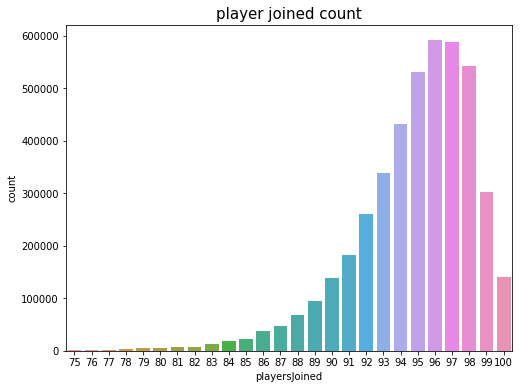

In [12]:
pd.options.display.float_format = '{:.4f}'.format
display(data.playersJoined.describe())
plt.figure(figsize=(8,6))
sns.countplot(data[data['playersJoined']>=75]['playersJoined'])
plt.title('player joined count', fontsize = 15)
plt.show()

# max가 100명 인 것을 확인

### maxPlace, numGoups 비교

In [13]:
data[['maxPlace','numGroups']].head()

,maxPlace,numGroups
0,28,26
1,26,25
2,50,47
3,31,30
4,97,95


### Create normalized features 

경기에 있는 사람 수 ('playerJoined' column)에 따라 같은 킬수라도 다른 가치!

따라서 kills count와 관련 있는 columns들 normalized

In [14]:
# Create normalized features 
# + 내가 생각한 경기 참여 인원 수에 따른 normalized가 필요한 columns = assists, killstreaks, headshotkills

data['killsNorm'] = data.kills * ((100 - data.playersJoined)/100 + 1)
data['damageDealtNorm'] = data.damageDealt * ((100 - data.playersJoined)/100 + 1)
data['maxPlaceNorm'] = data['maxPlace']*((100-data['playersJoined'])/100 + 1)
data['assistsNorm'] = data['assists']*((100-data['playersJoined'])/100 + 1)
data['killStreaksNorm'] = data['killStreaks']*((100-data['playersJoined'])/100 + 1)
data['headshotKillsNorm'] = data['headshotKills']*((100-data['playersJoined'])/100 + 1)


# Compare standard features and normalized features
data[['Id','winPlacePerc','kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'assists', 'assistsNorm', 'killStreaks', 'killStreaksNorm', 'headshotKills', 'headshotKillsNorm']].head()


,Id,winPlacePerc,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,assists,assistsNorm,killStreaks,killStreaksNorm,headshotKills,headshotKillsNorm
0,7f96b2f878858a,0.4443,0,0.0000,0.0000,0.0000,28,29.1200,0,0.0000,0,0.0000,0,0.0000
1,eef90569b9d03c,0.6401,0,0.0000,91.5000,99.7350,26,28.3400,0,0.0000,0,0.0000,0,0.0000
2,1eaf90ac73de72,0.7754,0,0.0000,68.0000,69.3600,50,51.0000,1,1.0200,0,0.0000,0,0.0000
3,4616d365dd2853,0.1667,0,0.0000,32.9062,35.8678,31,33.7900,0,0.0000,0,0.0000,0,0.0000
4,315c96c26c9aac,0.1875,1,1.0300,100.0000,103.0000,97,99.9100,0,0.0000,1,1.0300,0,0.0000


In [15]:
# 정규화 안한 column들 drop
data = data.drop(columns = ['kills','damageDealt', 'maxPlace', 'assists','killStreaks', 'headshotKills'], axis=1)
data.head(10)

,Id,groupId,matchId,boosts,DBNOs,heals,killPlace,killPoints,longestKill,matchDuration,matchType,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,assistsNorm,killStreaksNorm,headshotKillsNorm
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0,60,1241,0.0000,1306,squad-fpp,26,-1,0,0.0000,0,0.0000,0,0,244.7500,1,1466,0.4443,96,0.0000,0.0000,29.1200,0.0000,0.0000,0.0000
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,0,57,0,0.0000,1777,squad-fpp,25,1484,0,0.0045,0,11.0391,0,0,1434.0000,5,0,0.6401,91,0.0000,99.7350,28.3400,0.0000,0.0000,0.0000
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,0,0,0,47,0,0.0000,1318,duo,47,1491,0,0.0000,0,0.0000,0,0,161.7500,2,0,0.7754,98,0.0000,69.3600,51.0000,1.0200,0.0000,0.0000
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,0,75,0,0.0000,1436,squad-fpp,30,1408,0,0.0000,0,0.0000,0,0,202.7500,3,0,0.1667,91,0.0000,35.8678,33.7900,0.0000,0.0000,0.0000
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,0,45,0,58.5312,1424,solo-fpp,95,1560,0,0.0000,0,0.0000,0,0,49.7500,2,0,0.1875,97,1.0300,103.0000,99.9100,0.0000,1.0300,0.0000
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,1,0,44,0,18.4375,1395,squad-fpp,28,1418,0,0.0000,0,0.0000,0,0,34.6875,1,0,0.0370,95,1.0500,105.0000,29.4000,0.0000,1.0500,1.0500
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0,96,1262,0.0000,1316,squad-fpp,28,-1,0,0.0000,0,0.0000,0,0,13.5000,1,1497,0.0000,97,0.0000,0.0000,28.8400,0.0000,0.0000,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,0,48,1000,0.0000,1967,solo-fpp,92,-1,0,2004.0000,0,0.0000,0,0,1089.0000,6,1500,0.7368,96,0.0000,8.8806,99.8400,0.0000,0.0000,0.0000
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,0,64,0,0.0000,1375,squad,27,1493,0,0.0000,0,0.0000,0,0,800.0000,4,0,0.3704,97,0.0000,53.1416,28.8400,0.0000,0.0000,0.0000
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,0,74,0,0.0000,1930,squad,27,1349,0,0.0000,0,0.0000,0,0,65.6875,1,0,0.2144,97,0.0000,38.3997,29.8700,0.0000,0.0000,0.0000


### heals, boosts 회복 columns -> healsandboosts

In [16]:
# Create new feature healsandboosts
data['healsandboosts'] = data['heals'] + data['boosts']
data[['heals', 'boosts', 'healsandboosts']].tail()

,heals,boosts,healsandboosts
4446961,0,0,0
4446962,0,1,1
4446963,0,0,0
4446964,2,4,6
4446965,1,2,3


,heals,boosts,healsandboosts,winPlacePerc
heals,1.0000,0.5359,0.9277,0.4279
boosts,0.5359,1.0000,0.8123,0.6342
healsandboosts,0.9277,0.8123,1.0000,0.5760
winPlacePerc,0.4279,0.6342,0.5760,1.0000


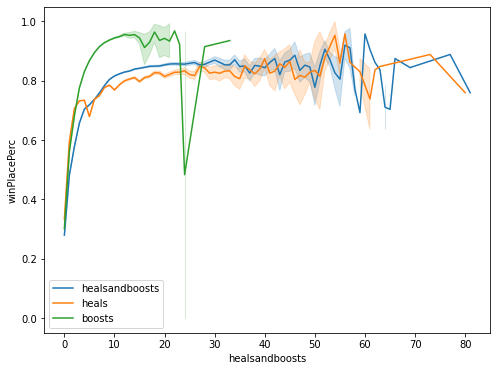

In [17]:
display(data[['heals', 'boosts', 'healsandboosts', 'winPlacePerc']].corr())
plt.figure(figsize=(8,6))
sns.lineplot(data=data[['heals', 'boosts','healsandboosts', 'winPlacePerc']], x='healsandboosts', y='winPlacePerc', label = 'healsandboosts')
sns.lineplot(data=data[['heals', 'boosts','healsandboosts', 'winPlacePerc']], x='heals', y='winPlacePerc', label = 'heals')
sns.lineplot(data=data[['heals', 'boosts','healsandboosts', 'winPlacePerc']], x='boosts', y='winPlacePerc', label = 'boosts')
plt.legend()
plt.show()


In [18]:
data = data.drop(columns=['heals', 'boosts'], axis=1)
data.head(2)

,Id,groupId,matchId,DBNOs,killPlace,killPoints,longestKill,matchDuration,matchType,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,assistsNorm,killStreaksNorm,headshotKillsNorm,healsandboosts
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,60,1241,0.0000,1306,squad-fpp,26,-1,0,0.0000,0,0.0000,0,0,244.7500,1,1466,0.4443,96,0.0000,0.0000,29.1200,0.0000,0.0000,0.0000,0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,57,0,0.0000,1777,squad-fpp,25,1484,0,0.0045,0,11.0391,0,0,1434.0000,5,0,0.6401,91,0.0000,99.7350,28.3400,0.0000,0.0000,0.0000,0


### totalDistance = rideDistance + walkDistance + swimDistance 
이상치 확인 및 drop<br>
각 Distance 마다 이상치 제외한 범위 설정

In [19]:
# Create feature totalDistance
data['totalDistance'] = data['rideDistance'] + data['walkDistance'] + data['swimDistance']

# Create feature killsWithoutMoving
data['killsWithoutMoving'] = ((data['killsNorm'] > 0) & (data['totalDistance'] == 0))
# Moving 기록이 없는데 kills수가 있는 경우 -> 이상치!
print(data.killsWithoutMoving.sum()) # 1535개
print(data.shape)
data = data.drop(data[data.killsWithoutMoving == True].index)
print(data.shape)
data = data.drop('killsWithoutMoving', axis = 1)

1535
(4446965, 31)
(4445430, 31)


columns drop and reduce_mem_usage

In [21]:
# 팀원들과 상의하여 drop하기로 결정한 columns drop
data = data.drop(columns=['Id', 'groupId', 'rankPoints','matchDuration', 'roadKills', 'teamKills', 'killPoints', 'winPoints'],axis=1)
data.head(2)

,matchId,DBNOs,killPlace,longestKill,matchType,numGroups,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,assistsNorm,killStreaksNorm,headshotKillsNorm,healsandboosts,totalDistance
0,a10357fd1a4a91,0,60,0.0000,squad-fpp,26,0,0.0000,0.0000,0,244.7500,1,0.4443,96,0.0000,0.0000,29.1200,0.0000,0.0000,0.0000,0,244.7500
1,aeb375fc57110c,0,57,0.0000,squad-fpp,25,0,0.0045,11.0391,0,1434.0000,5,0.6401,91,0.0000,99.7350,28.3400,0.0000,0.0000,0.0000,0,1445.0000


In [ ]:
data = reduce_mem_usage(data)
data.info()

- 맵 전체의 크기가 에란겔 기준 8x8km, longestKill 및 Distance columns의 단위는 m라고 생각
- 평균 배그 1판에 1등 기준으로 25~30분 경기<br><br>

- longestKill
    - longestKill이 없는데 Kills수가 있는 것은 이상치로 판단
    - 최대 스코프가 16배, 따라서, 대략 800m이상은 이상치로 판단<br><br>

- walkDistance
    - 1km(1000m) 뛰어서 약 2분 30초가 걸림 (1분에 400m)
    - 따라서 접전 시간도 있으니 20분이 최대라고 생각 -> 약 8000m가 최대<br><br>

- swimDistance
    - 1km(1000m) 수영으로 약 5분 걸림 (1분에 200m)
    - 따라서 접전 시간도 있고 주로 다리가 아닌 다리밑으로 지나갈때 수영하기 때문에 10분이 최대라고 생각 -> 약 2000m가 최대<br><br>

- rideDistance
    - 대부분 경기 중 최대 100km 속도로 달림
    - 따라서 접전 시간도 있으니 20분이 최대라고 생각 -> 약 20000m가 최대<br><br>

- longestKill
    - 최대 스코프가 16배, 따라서, 대략 800m이상은 이상치로 판단<br><br>

- 걷기, 수영 속도관련 정보 출처 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=zimkjh&logNo=221210600449
- 차량 속도 관련 출처 : https://www.youtube.com/watch?v=e33LHRvJg3o&t=79s


#### longestkills

In [23]:
# longestKill이 있어야 Kills수가 있다고 생각 -> longestKill이 없는데 kills수가 있는 것 이상치

data[(data.longestKill == 0) & (data.killsNorm != 0)].matchType.value_counts()
# matchType에 따라 다를수도 있다고 생각하여 확인한 결과 거의 모든 matchType이 나옴 -> matchType에 따른 영향 X

display(data[(data.longestKill == 0) & (data.killsNorm != 0)]['killsNorm'].describe())
display(data[(data.longestKill == 0) & (data.killsNorm != 0)].shape)
# 이 경우는 차량파괴로 인한 사망, 처음 무기를 얻기 전 근거리 공격 등 특수한 경우라 생각

count   8993.0000
mean       1.2432
std        0.7339
min        1.0000
25%        1.0303
50%        1.0498
75%        1.0898
max       17.6406
Name: killsNorm, dtype: float64

(8993, 22)

In [24]:
print(data.shape)
data = data.drop(data[(data.longestKill == 0) & (data.killsNorm != 0)].index)
print(data.shape)

(4445430, 22)
(4436437, 22)


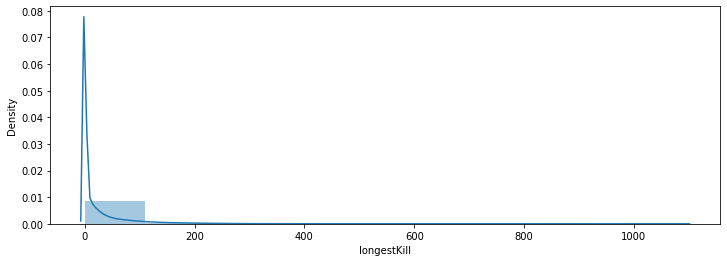

In [25]:
plt.figure(figsize=(12,4))
sns.distplot(data['longestKill'], bins=10)
plt.show()

In [26]:
print(data.shape)
print(data[data.longestKill > 800].shape)
data = data.drop(data[data['longestKill'] > 800].index)
print(data.shape)

(4436437, 22)
(252, 22)
(4436185, 22)


#### walkDistance

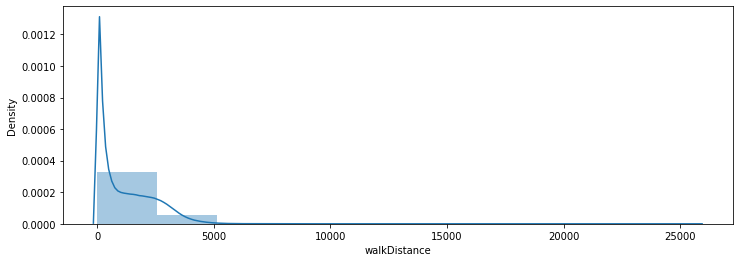

In [27]:
plt.figure(figsize=(12,4))
sns.distplot(data['walkDistance'], bins=10)
plt.show()

In [28]:
print(data.shape)
print(data[data.walkDistance > 8000].shape)
data = data.drop(data[data.walkDistance > 8000].index)
print(data.shape)

(4436185, 22)
(1070, 22)
(4435115, 22)


#### swimDistance

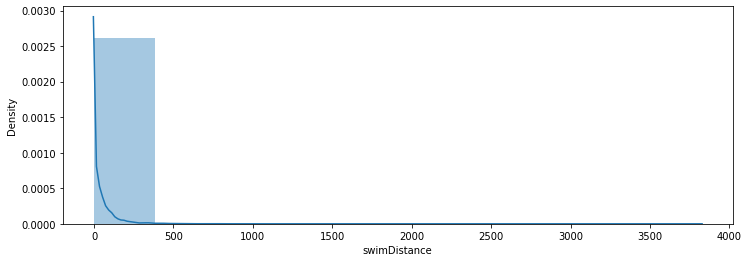

In [29]:
plt.figure(figsize=(12,4))
sns.distplot(data['swimDistance'], bins=10)
plt.show()

In [30]:
print(data.shape)
print(data[data.swimDistance > 2000].shape)
data = data.drop(data[data.swimDistance > 2000].index)
print(data.shape)

(4435115, 22)
(11, 22)
(4435104, 22)


#### rideDistance

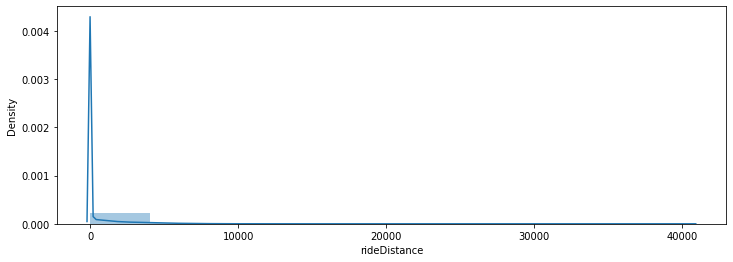

In [31]:
plt.figure(figsize=(12,4))
sns.distplot(data['rideDistance'], bins=10)
plt.show()

In [32]:
print(data.shape)
print(data[data.rideDistance > 20000].shape)
data = data.drop(data[data.rideDistance > 20000].index)
print(data.shape)

(4435104, 22)
(150, 22)
(4434954, 22)


In [33]:
data.head(2)

,matchId,DBNOs,killPlace,longestKill,matchType,numGroups,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,assistsNorm,killStreaksNorm,headshotKillsNorm,healsandboosts,totalDistance
0,a10357fd1a4a91,0,60,0.0000,squad-fpp,26,0,0.0000,0.0000,0,244.7500,1,0.4443,96,0.0000,0.0000,29.1250,0.0000,0.0000,0.0000,0,244.7500
1,aeb375fc57110c,0,57,0.0000,squad-fpp,25,0,0.0045,11.0391,0,1434.0000,5,0.6401,91,0.0000,99.7500,28.3438,0.0000,0.0000,0.0000,0,1445.0000


### kills, assists, killstreak, headshotKills, DBNOs, damageDealt -> kill 관련 column

In [34]:
print(data[data.killsNorm == data.killStreaksNorm].shape)
print(data[data.killsNorm > data.killStreaksNorm].shape)
print(data[data.killsNorm < data.killStreaksNorm].shape)
# killstreak count는 kills count에 추가됨을 확인!

# total kills count column 추가
data['totalkills'] = data.killsNorm + data.assistsNorm + data.headshotKillsNorm
data.head(2)

(3601484, 22)
(833470, 22)
(0, 22)


,matchId,DBNOs,killPlace,longestKill,matchType,numGroups,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,assistsNorm,killStreaksNorm,headshotKillsNorm,healsandboosts,totalDistance,totalkills
0,a10357fd1a4a91,0,60,0.0000,squad-fpp,26,0,0.0000,0.0000,0,244.7500,1,0.4443,96,0.0000,0.0000,29.1250,0.0000,0.0000,0.0000,0,244.7500,0.0000
1,aeb375fc57110c,0,57,0.0000,squad-fpp,25,0,0.0045,11.0391,0,1434.0000,5,0.6401,91,0.0000,99.7500,28.3438,0.0000,0.0000,0.0000,0,1445.0000,0.0000


In [35]:
# totalkills가 playerJoined보다 큰 경우 -> 이상치!
display(data[(data.totalkills > data.playersJoined)][['playersJoined', 'totalkills', 'matchType']].head(2))
display(data[(data.totalkills > data.playersJoined)].matchType.value_counts())
print(data.shape)
print(data[(data.totalkills > data.playersJoined)].shape) 
data = data.drop( data[(data.totalkills > data.playersJoined)].index )
print(data.shape)

,playersJoined,totalkills,matchType
1292,32,45.3750,normal-squad-fpp
2769,11,35.9062,normal-duo


normal-squad-fpp    590
normal-solo-fpp     507
normal-duo-fpp      386
normal-solo         128
normal-squad         90
normal-duo           48
duo-fpp               3
squad-fpp             1
Name: matchType, dtype: int64

(4434954, 23)
(1753, 23)
(4433201, 23)


#### kills

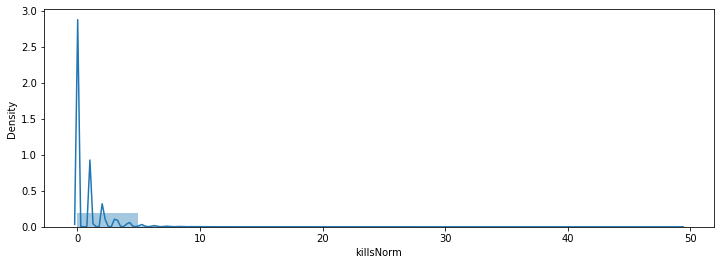

In [36]:
plt.figure(figsize=(12,4))
sns.distplot(data['killsNorm'], bins=10)
plt.show()

In [37]:
# killsNorm > 30 인 경우의 totalkills가 playersJoined와 근접함 - > 한 팀이 대부분의 playerJoined를 죽임 -> 이상치로 판단
data[data['killsNorm'] > 30].iloc[:, 5:][['totalDistance', 'playersJoined', 'killsNorm', 'totalkills']].head(10)

,totalDistance,playersJoined,killsNorm,totalkills
40047,3532.0000,54,32.1250,45.2500
253317,137.8750,54,30.6562,39.4062
614992,3474.0000,61,40.3125,58.3750
699452,400.2500,54,32.1250,52.5625
815970,615.0000,58,31.2344,52.5312
998562,543.0000,47,35.1875,41.3125
1375624,108.6875,49,33.2188,37.7500
1542112,267.2500,48,30.4062,36.4688
1703183,89.2500,48,33.4375,47.1250
1749611,428.7500,52,34.0312,48.8125


In [38]:
print(data.shape)
print(data[data.killsNorm > 30].shape)
data = data.drop(data[data.killsNorm > 30].index)
print(data.shape)

(4433201, 23)
(37, 23)
(4433164, 23)


#### assists

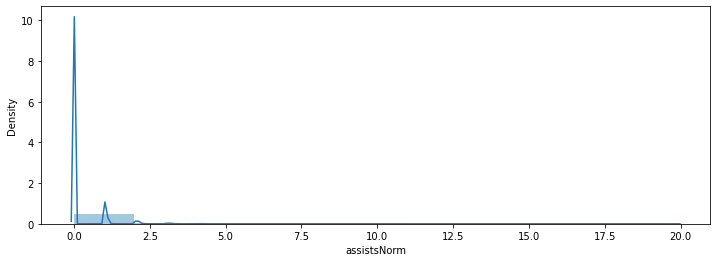

In [39]:
plt.figure(figsize=(12,4))
sns.distplot(data['assistsNorm'], bins=10)
plt.show()

In [40]:
# assistsNorm > 12 인 경우의 totalkills가 playersJoined와 근접함 - > 한 팀이 대부분의 playerJoined를 죽임 -> 이상치로 판단
data[(data['assistsNorm'] > 12)].iloc[:, 5:][['totalDistance', 'playersJoined','totalkills', 'killsNorm','assistsNorm']].head()

,totalDistance,playersJoined,totalkills,killsNorm,assistsNorm
12730,534.0000,47,41.3125,19.8906,12.2422
37903,2644.0000,41,28.6250,12.7188,12.7188
65128,62.7812,47,38.2500,21.4219,12.2422
84345,1122.0000,36,29.5156,14.7578,13.1172
122543,4812.0000,54,43.8125,21.9062,17.5156


In [41]:
print(data.shape)
print(data[data.assistsNorm > 12].shape)
data = data.drop(data[data.assistsNorm > 12].index)
print(data.shape)

(4433164, 23)
(86, 23)
(4433078, 23)


#### headshotkills

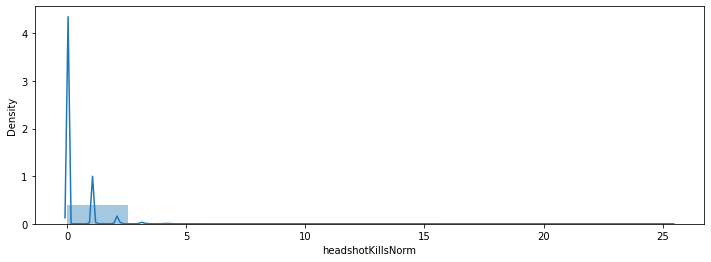

In [42]:
plt.figure(figsize=(12,4))
sns.distplot(data['headshotKillsNorm'], bins=10)
plt.show()

In [43]:
data.headshotKillsNorm.sort_values(ascending = False).head(10)

1359487   25.3750
2145792   22.7188
1463968   22.2656
979479    19.5625
539354    19.5469
3693833   19.3594
1699036   18.8750
4240315   18.7188
3399193   18.7188
1744909   18.1875
Name: headshotKillsNorm, dtype: float16

In [44]:
# headshotKillsNorm > 20 인 경우의 totalkills가 playersJoined와 근접함 - > 한 팀이 대부분의 playerJoined를 죽임 -> 이상치로 판단
data[(data['headshotKillsNorm'] > 20)][['totalDistance', 'playersJoined','totalkills', 'killsNorm','assistsNorm','headshotKillsNorm']]

,totalDistance,playersJoined,totalkills,killsNorm,assistsNorm,headshotKillsNorm
1359487,3482.0000,59,53.5625,28.2031,0.0000,25.3750
1463968,3068.0000,94,48.7500,26.5000,0.0000,22.2656
2145792,583.0000,58,55.3750,29.8125,2.8398,22.7188


In [45]:
print(data.shape)
print(data[data.headshotKillsNorm > 20].shape)
data = data.drop(data[data.headshotKillsNorm > 20].index)
print(data.shape)

(4433078, 23)
(3, 23)
(4433075, 23)


#### killStreak

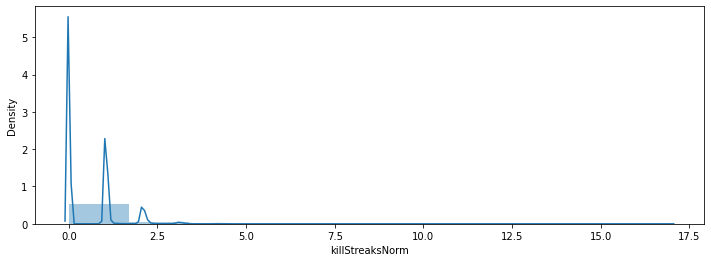

In [46]:
plt.figure(figsize=(12,4))
sns.distplot(data['killStreaksNorm'], bins=10)
plt.show()

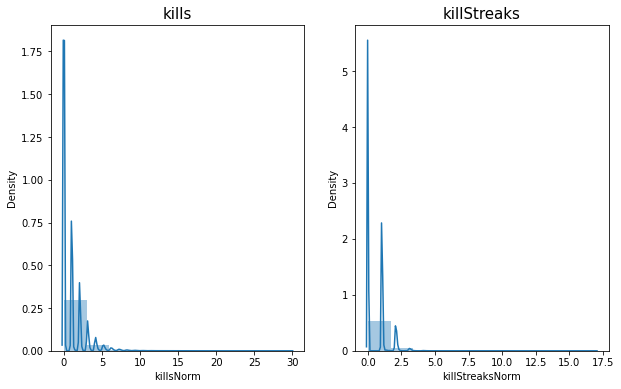

In [47]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.distplot(data.killsNorm, bins = 10)
plt.title('kills', fontsize = 15)

plt.subplot(1,2,2)
sns.distplot(data.killStreaksNorm, bins = 10)
plt.title('killStreaks', fontsize = 15)

plt.show()

In [48]:
# killStreak가 kills에 포함되어 있음
print(data[data.killsNorm == data.killStreaksNorm].shape)
print(data[data.killsNorm > data.killStreaksNorm].shape)
print(data[data.killsNorm < data.killStreaksNorm].shape)

# 둘의 상관관계는 0.81 매우 높고, 분포가 비슷하므로 다중공선성 문제가 발생할 수 있음. 
display(data[['killsNorm', 'killStreaksNorm', 'winPlacePerc']].corr())

(3601480, 23)
(831595, 23)
(0, 23)


,killsNorm,killStreaksNorm,winPlacePerc
killsNorm,1.0000,0.8112,0.4233
killStreaksNorm,0.8112,1.0000,0.3768
winPlacePerc,0.4233,0.3768,1.0000


In [49]:
# 따라서 killStreak columns drop
data = data.drop('killStreaksNorm', axis=1)
data.head(2)

,matchId,DBNOs,killPlace,longestKill,matchType,numGroups,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,assistsNorm,headshotKillsNorm,healsandboosts,totalDistance,totalkills
0,a10357fd1a4a91,0,60,0.0000,squad-fpp,26,0,0.0000,0.0000,0,244.7500,1,0.4443,96,0.0000,0.0000,29.1250,0.0000,0.0000,0,244.7500,0.0000
1,aeb375fc57110c,0,57,0.0000,squad-fpp,25,0,0.0045,11.0391,0,1434.0000,5,0.6401,91,0.0000,99.7500,28.3438,0.0000,0.0000,0,1445.0000,0.0000


#### DBNOs

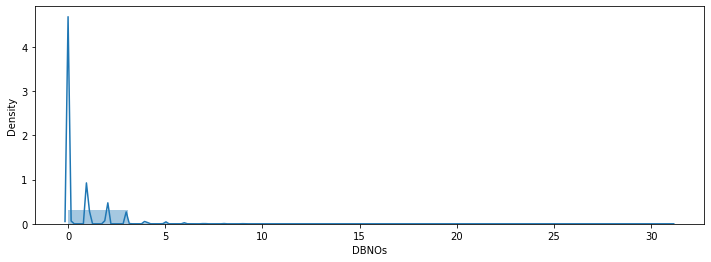

In [50]:
plt.figure(figsize=(12,4))
sns.distplot(data['DBNOs'], bins=10)
plt.show()

In [51]:
data.DBNOs.describe()

count   4433075.0000
mean          0.6571
std           1.1330
min           0.0000
25%           0.0000
50%           0.0000
75%           1.0000
max          31.0000
Name: DBNOs, dtype: float64

In [52]:
# DBNOs의 수가 큰 데이터를 확인한 결과 totalkills가 playersJoined와 근접한 경우가 거의 없음 -> 이상치 X
data[(data['DBNOs'] > 15) & (data['DBNOs'] <= 20)][['matchType', 'totalDistance', 'playersJoined','totalkills','DBNOs']]

,matchType,totalDistance,playersJoined,totalkills,DBNOs
18038,normal-squad-fpp,435.0000,54,40.8750,19
160732,squad-fpp,6440.0000,91,13.0781,17
166227,normal-squad-fpp,2132.0000,47,32.1250,16
294040,normal-squad-fpp,548.0000,86,34.1875,20
318097,squad,5028.0000,100,23.0000,18
...,...,...,...,...,...
4312062,normal-squad-fpp,2086.0000,47,32.1250,16
4343400,normal-squad-fpp,1574.0000,36,27.8906,18
4343795,normal-squad-fpp,136.8750,54,43.7812,18
4390901,squad,3180.0000,91,37.0625,16


#### damageDealt

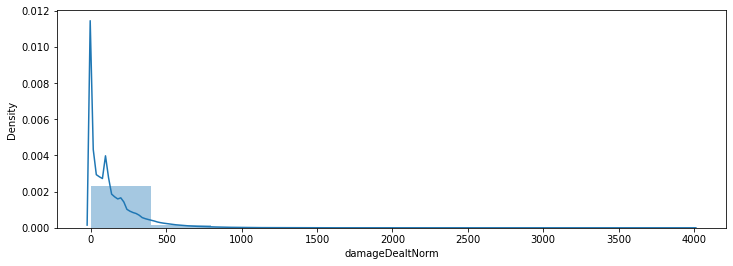

In [53]:
plt.figure(figsize=(12,4))
sns.distplot(data['damageDealtNorm'], bins=10)
plt.show()

In [54]:
data.damageDealtNorm.describe()

count   4433075.0000
mean             NaN
std              NaN
min           0.0000
25%           0.0000
50%          88.4375
75%         196.0000
max        3988.0000
Name: damageDealtNorm, dtype: float64

In [55]:
# damageDealtNorm의 수가 큰 데이터를 확인한 결과 totalkills가 playersJoined와 근접한 경우가 거의 없음 -> 이상치 X
data[(data['damageDealtNorm'] > 3000)][['matchType', 'totalDistance','damageDealtNorm', 'playersJoined','totalkills']].head()

,matchType,totalDistance,damageDealtNorm,playersJoined,totalkills
118502,squad,3754.0000,3988.0000,83,29.2500
625631,solo,4568.0000,3012.0000,79,30.2500
674357,normal-squad-fpp,212.7500,3008.0000,40,35.1875
687254,normal-squad-fpp,157.0000,3910.0000,40,32.0000
1372911,normal-squad-fpp,108.3125,3102.0000,54,45.2500


### weaponsAcquired, vehicleDestroys

weaponsAcquired (무기 얻은 갯수)<br>
무기 - 총, 권총, 투척무기(화염병, 수륙탄, 섬광탄 등등)

##### weaponsAcquired

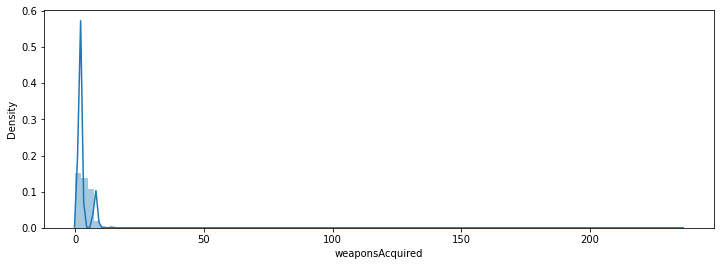

In [56]:
plt.figure(figsize=(12,4))
sns.distplot(data['weaponsAcquired'], bins=100)
plt.show()

In [57]:
data.weaponsAcquired.describe()

count   4433075.0000
mean          3.6461
std           2.3809
min           0.0000
25%           2.0000
50%           3.0000
75%           5.0000
max         236.0000
Name: weaponsAcquired, dtype: float64

In [58]:
data.weaponsAcquired.sort_values(ascending = False).head(10)

2982525    236
2749693    177
2743408    167
2797867    153
233643     128
1437471    102
4022031     97
1834515     96
2442962     95
1449293     95
Name: weaponsAcquired, dtype: int16

In [59]:
# weaponsAcquired의 무기를 총, 권총, 투척무기(화염병, 수륙탄, 섬광탄 등등)라고 생각, 따라서 90개 이상은 파밍할수 없다고 판단
data[(data['weaponsAcquired'] > 90)][['matchType', 'totalDistance','weaponsAcquired', 'playersJoined','totalkills']]

,matchType,totalDistance,weaponsAcquired,playersJoined,totalkills
233643,duo,3188.0000,128,91,0.0000
1437471,squad-fpp,5300.0000,102,97,2.0605
1449293,squad-fpp,653.0000,95,80,0.0000
1834515,squad,2836.0000,96,95,1.0498
2442962,squad-fpp,807.5000,95,91,0.0000
2743408,duo,3318.0000,167,90,2.1992
2749693,squad-fpp,3642.0000,177,98,4.0781
2797867,solo-fpp,1235.0000,153,98,0.0000
2982525,squad-fpp,6888.0000,236,99,0.0000
4022031,duo,2464.0000,97,96,2.0801


In [60]:
print(data.shape)
print(data[data.weaponsAcquired > 90].shape)
data = data.drop(data[data.weaponsAcquired > 90].index)
print(data.shape)

(4433075, 22)
(10, 22)
(4433065, 22)


##### vehicleDestroys

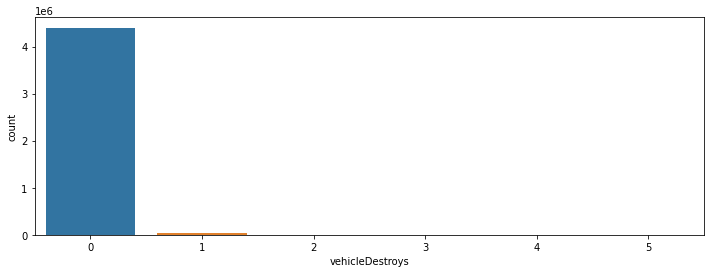

In [61]:
plt.figure(figsize=(12,4))
sns.countplot(data['vehicleDestroys'])
plt.show()

In [62]:
data.vehicleDestroys.value_counts()

0    4399435
1      32306
2       1215
3         95
4         11
5          3
Name: vehicleDestroys, dtype: int64